## IA challenge Pierre Fabre - Melanmo detection using deep learning 

##### library

In [1]:
import pandas as pd
from PIL import Image
from IPython.display import Image
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageChops, ImageFilter
import glob
import keras as k
import os
from PIL import Image, ImageOps
import numpy as np
from scipy.misc import imresize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import scipy.misc
from random import randint


Using TensorFlow backend.


#### Function

In [2]:
def plot_accuracy_epoch(y) : 
    y = [i*100 for i in y]
    n = len(y)
    x = [i for i in range(1,n+1)]

    fig, ax = plt.subplots()

    line1, = ax.plot(x,y,
                     label='Accuracy')

    ax.legend(loc='lower right')

    plt.show()

##### Dataset

In [3]:
label = pd.read_csv("label_learn.csv", delimiter = ';')
label['name_title'] = label.name.map(lambda x : x.split(".")[0])
label["label_bin"] = label.label.map(lambda x: 1 if x == 'malignant' else 0)
label.head()
print(len(label))

8581


In [4]:
label.groupby(['label']).count()/len(label)*100

,name,name_title,label_bin
label,,,
benign,92.087169,92.087169,92.087169
malignant,7.912831,7.912831,7.912831


8581 Images of malignant and benign mole.
Challenge : melanoma prediction

##### Sample

In [5]:
dir_path = './training_set'
img_dir = os.listdir(dir_path)
img_dir = [ i for i in img_dir if not i.startswith('.')]

In [6]:
def show_img(path):
    image_file = Image.open(path)
    plt.imshow(np.array(image_file))
    plt.title("Image : " + path)
    plt.show()

In [7]:
label.head()

,name,label,name_title,label_bin
0,0000000.jpg,benign,0000000,0
1,0000002.jpg,malignant,0000002,1
2,0000006.jpg,benign,0000006,0
3,0000008.jpg,benign,0000008,0
4,0000009.jpg,benign,0000009,0


Benign Mole

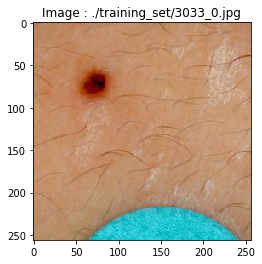

In [21]:
show_img(dir_path + '/' + img_dir[randint(0, len(label))])

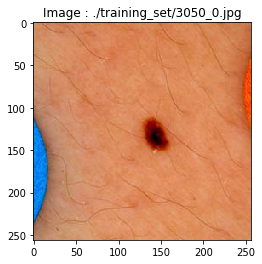

In [20]:
show_img(dir_path + '/' + img_dir[randint(0, len(label))])

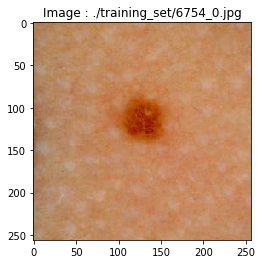

In [16]:
show_img(dir_path + '/' + img_dir[randint(0, len(label))])

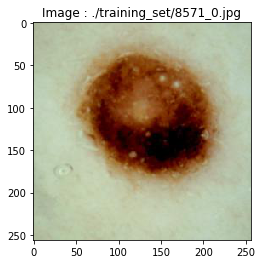

In [17]:
show_img(dir_path + '/' + img_dir[randint(0, len(label))])

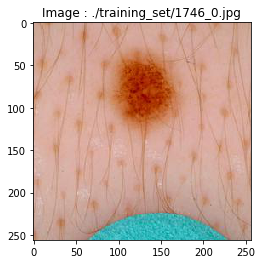

In [18]:
show_img(dir_path + '/' + img_dir[randint(0, len(label))])

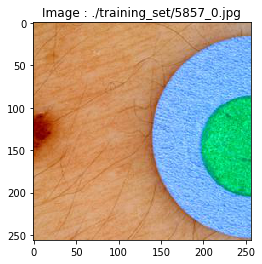

In [19]:
show_img(dir_path + '/' + img_dir[randint(0, len(label))])

### No filter

In [9]:
path = './data/0000158.jpg'
image_no_filter = Image.open(path)
image = Image.open(path)
plt.imshow(np.array(image_no_filter))
plt.title("No preprocessing")

Text(0.5,1,u'No preprocessing')

## Methodology

Based on the ABCDE dermatologic rules. I applied different filters.

### Gaussian Blur Filter

To reduce hair effect on picture

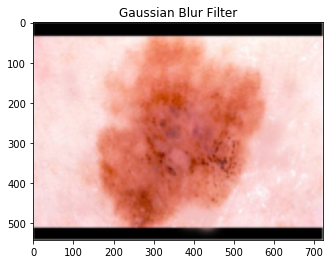

In [10]:
image = image.filter(ImageFilter.GaussianBlur)
plt.imshow(np.array(image))
plt.title("Gaussian Blur Filter")
plt.show()

### Contrast

Increase color variation and shape to highlight non-asymetric and non-homogenous structure

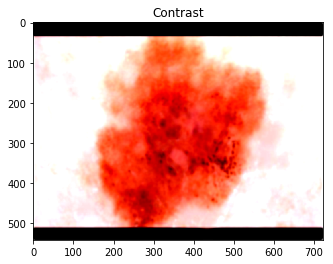

In [11]:
contrast = ImageEnhance.Contrast(image)
image =contrast.enhance(2)
plt.imshow(np.array(image))
plt.title("Contrast")
plt.show()

### GrayScale


Finally, no gray scale filter was applied to the picture as color is an important feature for melanoma detection

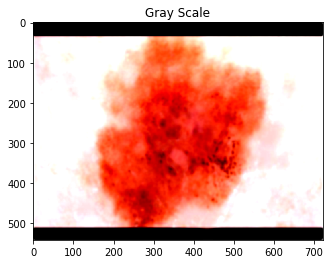

In [12]:
#image = image.convert('L')
plt.imshow(np.array(image), cmap="gray")
plt.title("Gray Scale")
plt.show()

### Crop 


Try to reduce the picture size to focus on the mole itself

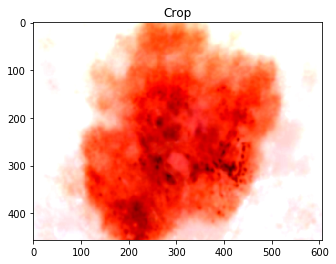

In [13]:
rate = 1
rate = rate - 0.08
w = image.size[0]
h = image.size[1]
w_max = w * rate
h_max = h * rate
n = np.array(image).shape[0]
w_min = w - w_max
h_min = h - h_max

image = image.crop((w_min,h_min,w_max,h_max))


image_show = np.array(image)
plt.imshow(image_show,cmap="gray")
plt.title("Crop")
plt.show()

For each images in the dataset, I applied all those filters.

In [14]:
def image_preprocessing(image): 
    
    #image = Image.open(path)
    image = image.filter(ImageFilter.GaussianBlur)
    contrast = ImageEnhance.Contrast(image)
    image =contrast.enhance(2)

    #image = image.convert('L')

    rate = 1
    rate = rate - 0.050
    w = image.size[0]
    h = image.size[1]
    w_max = w * rate
    h_max = h * rate
    n = np.array(image).shape[0]
    w_min = w - w_max
    h_min = h - h_max

    image = image.crop((w_min,h_min,w_max,h_max))
    #image_show = np.array(image)
    
    return(image)



In [15]:
plt.imshow(np.array(image_preprocessing(image_no_filter)), cmap="gray")

### Data augmentation 

In order to increase the dataset size, I performed data augmentation on the malignant mole picture.
This was also a way to rebalanced the classes (benign/malignant)

* Fliping
* Rotation 
* Croping

In [ ]:
def flip_image(im) : 
    flip = ['None' , Image.FLIP_LEFT_RIGHT, Image.FLIP_TOP_BOTTOM, Image.ROTATE_90, Image.ROTATE_180, Image.ROTATE_270]
    length = 256
    width = 256
    ori_imgs = []

    for transp in flip :
        
        if transp != 'None':
            img_transpose = im.transpose(transp)
        else : img_transpose = im
        img_preprocess = image_preprocessing(img_transpose)
        ori_imgs.append(ImageOps.fit(img_preprocess, (length, width), Image.ANTIALIAS))
    
    return(ori_imgs)

In [ ]:
all = flip_image(image_no_filter)
flip_label = ['None','Left Right' ,'Flip Top Bottom', 'Rotate 90','Rotate 180', 'Rotate 270']

In [ ]:
for ima in range(0,len(flip_label)) :
    plt.figure()
    plt.imshow(np.array(all[ima]), cmap="gray")
    plt.title("Flipping to : " + flip_label[ima])

In [ ]:
import pandas as pd
from PIL import Image
from IPython.display import Image
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageChops, ImageFilter
import glob
import keras as k
import os
from PIL import Image, ImageOps
import numpy as np
from scipy.misc import imresize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import scipy.misc

def image_preprocessing(image): 
    
    #image = Image.open(path)
    image = image.filter(ImageFilter.GaussianBlur)
    contrast = ImageEnhance.Contrast(image)
    image =contrast.enhance(2)

    image = image.convert('L')

    rate = 1
    rate = rate - 0.050
    w = image.size[0]
    h = image.size[1]
    w_max = w * rate
    h_max = h * rate
    n = np.array(image).shape[0]
    w_min = w - w_max
    h_min = h - h_max

    image = image.crop((w_min,h_min,w_max,h_max))
    #image_show = np.array(image)
    
    return(image)


def flip_image(im) : 
    flip = ['None' , Image.FLIP_LEFT_RIGHT, Image.FLIP_TOP_BOTTOM, Image.ROTATE_90, Image.ROTATE_180, Image.ROTATE_270]
    length = 256
    width = 256
    ori_imgs = []

    for transp in flip :
        
        if transp != 'None':
            img_transpose = im.transpose(transp)
        else : img_transpose = im
        img_preprocess = image_preprocessing(img_transpose)
        ori_imgs.append(ImageOps.fit(img_preprocess, (length, width), Image.ANTIALIAS))
    
    return(ori_imgs)


def flipping_malignant(my_img):
    img_prepro = image_preprocessing(my_img)
    imgs_trsp1 = flip_image(img_prepro)
    img_transpo = img_prepro.transpose(Image.TRANSPOSE)
    imgs_trsp2 = flip_image(img_transpo)
    imgs_list = imgs_trsp2 + imgs_trsp1
    return(imgs_list)

square = 256
target = []
img_list = []
for i in range(0,len(label.name)): 
    
    if i%500 == 0:
        print(" Images processed {} %".format(float(i)/float(len(label.name))*100))
    cible = [label.label_bin[i]]
    filename = label.name[i] 
    path = './data/' + filename
    
    my_img = Image.open(path)
    
    if cible == [0] :
        
        imgs_l = image_preprocessing(my_img)
        imgs_l = [ImageOps.fit(imgs_l, (square,square), Image.ANTIALIAS)]
        
    elif cible == [1] :
        
        imgs_l = image_preprocessing(my_img)
        imgs_l = flipping_malignant(my_img)

    target = target + cible * len(imgs_l)
    img_list = img_list + imgs_l
    
X_full = np.array([np.array(im) for im in img_list])

for i in range(0,len(X_full)):
    
    filename = str(i) + "_" + str(target[i]) + '.jpg'
    path = './training_set/' + filename
    scipy.misc.imsave(path , X_full[i])
    

In [ ]:
def flipping_malignant(my_img):
    img_prepro = image_preprocessing(my_img)
    imgs_trsp1 = flip_image(img_prepro)
    img_transpo = img_prepro.transpose(Image.TRANSPOSE)
    imgs_trsp2 = flip_image(img_transpo)
    imgs_list = imgs_trsp2 + imgs_trsp1
    return(imgs_list)

In [ ]:
square = 256
target = []
img_list = []
for i in range(0,len(label.name)): 
    
    if i%500 == 0:
        print(" Images processed {} %".format(float(i)/float(len(label.name))*100))
    cible = [label.label_bin[i]]
    filename = label.name[i] 
    path = './data/' + filename
    
    my_img = Image.open(path)
    
    if cible == [0] :
        
        imgs_l = image_preprocessing(my_img)
        imgs_l = [ImageOps.fit(imgs_l, (square,square), Image.ANTIALIAS)]
        
    elif cible == [1] :
        
        imgs_l = image_preprocessing(my_img)
        imgs_l = flipping_malignant(my_img)

    target = target + cible * len(imgs_l)
    img_list = img_list + imgs_l
    
    

In [18]:
file_list = [ dir_path + '/' + i  for i in img_dir]
label_list = [ i.split("_")[-1].split('.')[0] for i in img_dir]
label_list = np.array(label_list).astype(int)

In [19]:
X_image = [np.array(Image.open(path)) for path in file_list]

In [20]:
X_train = np.array(X_image)
y_train = np.array(label_list) 
X_train.shape

(16050, 256, 256, 3)

In [21]:
X_train = X_train.reshape(X_train.shape[0], 3, 256, 256) #/255

####  Prediction set for the final submission

In [22]:
import os
import numpy as np

In [23]:
test_list = os.listdir("./test")
t_list = [ './test' + '/' + i  for i in test_list]


In [24]:
X_test = [np.array((ImageOps.fit(Image.open(path), (256, 256), Image.ANTIALIAS))) for path in file_list]

In [28]:
X_test = np.array(X_test)

In [29]:
X_test.shape

(16050, 3, 256, 256)

In [30]:
X_test = X_test.reshape(X_test.shape[0], 3, 256, 256)

#### Splitting Training and Validation set

In [ ]:
label.name_title = label.name_title.map(lambda x: float(x))
label = label.sort_values('name_title', ascending = 1)

In [ ]:
lb = LabelBinarizer().fit(list_label)
lab = lb.transform(list_label)


In [ ]:
lb = LabelBinarizer().fit(label.label_bin.values)
lab = lb.transform(label.label_bin.values)


In [ ]:
label = label.sort_values(['name_title'], ascending = 1)

In [48]:
trainX, validX, trainY, validY = train_test_split(X_train, y_train, test_size=0, random_state=42)

In [49]:
# Generate dummy data
import keras 
trainY = keras.utils.to_categorical(trainY, num_classes=2)
validY = keras.utils.to_categorical(validY, num_classes=2)


In [50]:
print("Number of images in the training set   {}".format(len(trainX)))
print("Number of images in the validation set   {}".format(len(validX)))

Number of images in the training set   16050
Number of images in the validation set   0


## Training using a VGG-16 without transfer learning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras import optimizers


In [ ]:
length = trainX[0].shape[0]


#### MODEL 1 TEST

In [53]:
trainX[0]
train_data.shape[1:]

array([[[252, 255, 246, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0, 119,   0],
        [  0, 160,   5, ..., 255, 255, 246],
        ..., 
        [  5,   5,  77, ...,   0,  28,   3],
        [  0,  33,   2, ...,  48,   7,   1],
        [255, 255, 255, ...,   2,   5,  93]],

       [[  3,   3,  88, ...,   0,  15,   2],
        [  0,  22,   2, ...,  50,   2,   0],
        [255, 255, 255, ...,   0,   0, 101],
        ..., 
        [198, 255, 210, ..., 255,  56,   0],
        [248,  92,   9, ...,   0,   9, 186],
        [  1,   6, 188, ..., 190, 255, 220]],

       [[177, 255, 204, ..., 255,  71,   0],
        [251,  95,  12, ...,   1,  10, 179],
        [  0,   6, 180, ..., 163, 255, 203],
        ..., 
        [ 52,  17,   0, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

In [54]:
model = Sequential()

model.add(ZeroPadding2D((1, 1), input_shape=(3,256, 256)))    
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
model.add(MaxPooling2D((2, 2), dim_ordering="th", strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
model.add(MaxPooling2D((2, 2),  dim_ordering="th",  strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
model.add(MaxPooling2D((2, 2), dim_ordering="th", strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
model.add(MaxPooling2D((2, 2),  dim_ordering="th",  strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
model.add(MaxPooling2D((2, 2), dim_ordering="th",  strides=(2, 2)))


model.add(Flatten(input_shape=trainX[0].shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.SGD(lr=0.001, momentum=0.9),
                  metrics=['accuracy'])


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_1")`
  after removing the cwd from sys.path.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_2")`
  
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), strides=(2, 2), data_format="channels_first")`
  import sys
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv2_1")`
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv2_2")`
  

In [55]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_14 (ZeroPaddi (None, 5, 258, 256)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 3, 256, 64)        147520    
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 5, 258, 64)        0         
_________________________________________________________________
conv1_2 (Conv2D)             (None, 3, 256, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 128, 32)        0         
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 5, 130, 32)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 3, 128, 128)       36992     
__________

In [ ]:
from keras.utils import to_categorical

print("training as start")

training_1 = model.fit(trainX, trainY, batch_size=32, nb_epoch=1, verbose=1)

print("Model training has been completed ")

score = model.evaluate(validX, validY, verbose=0)

print("Validation set ")
print('Test loss on validation set :', score[0])
print('Test accuracy on validation test :', score[1])

In [ ]:
print("buildin dataset")
predict = model.predict_proba(X_test)
predict = [i[1] for i in predict]

In [ ]:
print('EXPORT DATASET')
outcome = pd.DataFrame({'name':test_list, 'risk': predict})
outcome.to_csv("score.csv")